In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import statsmodels.api as sm
from matplotlib_venn import venn3

In [2]:
df_all=pd.read_pickle('common_data/fivepseq_abundance_tsr.pkl')
df_High=df_all[(df_all.High>1) & (df_all.Low==0)]
df_Low=df_all[(df_all.Low>1) & (df_all.High==0)]
tpm_lo=['pt212_lo_TPM','pt221_lo_TPM','pt226_lo_TPM','pt87_lo_TPM','pt214_lo_TPM']
tpm_hi=['pt212_hi_TPM','pt221_hi_TPM','pt226_hi_TPM','pt87_hi_TPM','pt214_hi_TPM']
tpm=np.hstack((tpm_hi,tpm_lo))

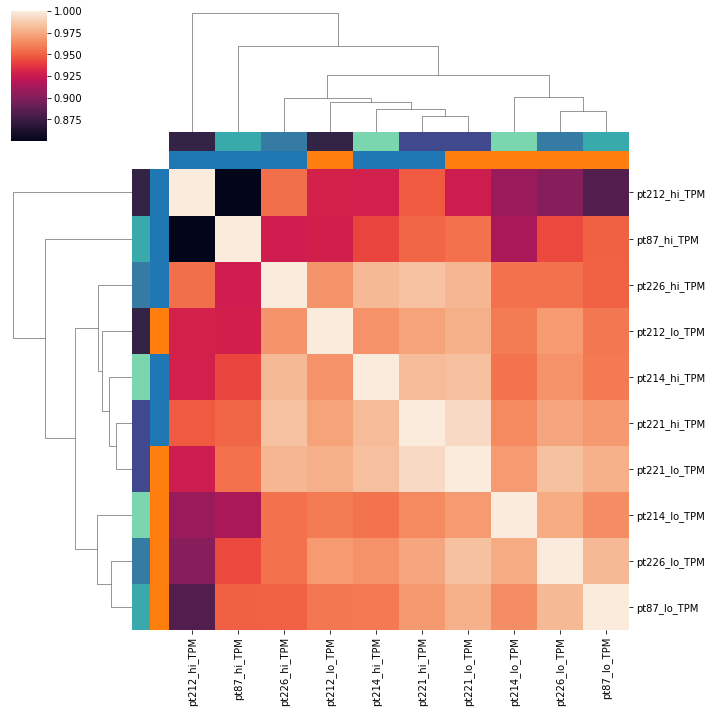

In [3]:
a=pd.DataFrame(np.zeros((len(tpm),len(tpm))),columns=tpm,index=tpm)
for x in tpm:
    for y in tpm:
        b=df_all[(df_all[x]>0) | (df_all[y]>0)]
        a.at[x,y]=stats.linregress(b[x],b[y])[2]
lut = dict(zip(tpm, np.vstack(([sns.color_palette()[0]]*5,[sns.color_palette()[1]]*5))))
row_colors = a.columns.map(lut)
lut2 = dict(zip(tpm, sns.color_palette('mako',5)*2))
row_colors2 = a.columns.map(lut2)

sns.clustermap(a,method='complete',row_colors=[row_colors2,row_colors],col_colors=[row_colors2,row_colors])
plt.savefig('Supplemental_Panels/SFig3A.pdf', transparent=True,dpi=500)

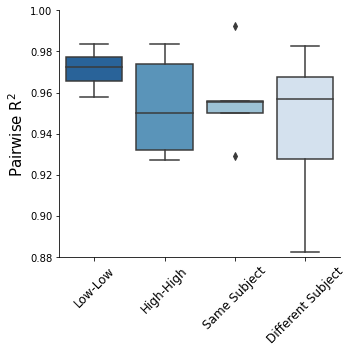

In [4]:
same_subject=[]
same_condition=[]
different=[]
low=[]
high=[]
for i,x in enumerate(tpm):
    for j,y in enumerate(tpm):
        if j>i:
            b=df_all[(df_all[x]>0) | (df_all[y]>0)]
            overlap=stats.linregress(b[x],b[y])[2]  
            if x.split('_')[0]==y.split('_')[0]:
                same_subject.append(overlap)
            elif x.split('_')[1]==y.split('_')[1]:
                same_condition.append(overlap)
                if 'lo' in x.split('_')[1]:
                    low.append(overlap)
                else:
                    high.append(overlap)
            else:
                different.append(overlap)
x1=np.vstack((low,['Low_Low']*len(low))).T
x2=np.vstack((high,['High_High']*len(high))).T
x3=np.vstack((same_subject,['Same_Subject_High_Low']*len(same_subject))).T
x4=np.vstack((different,['Different_Subject_High_Low']*len(different))).T
x=np.vstack((x1,x2,x3,x4))
x=pd.DataFrame(x,columns=['Overlap','Category'])
x.Overlap=x.Overlap.astype(float)
plt.figure(figsize=(5,5))
sns.boxplot(x='Category',y='Overlap',data=x,order=['Low_Low','High_High','Same_Subject_High_Low','Different_Subject_High_Low'],palette='Blues_r')
plt.xticks(np.arange(4),['Low-Low','High-High','Same Subject','Different Subject'],rotation=45,fontsize=12)
plt.yticks(fontsize=10)
plt.ylim([0.88,1])
plt.xlabel('')
plt.ylabel('Pairwise R$^{2}$',fontsize=15)
sns.despine()
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig3B.pdf', transparent=True,dpi=500)
plt.show()
plt.close()